Linear regression modelling with Sequential Feature Selection on full and LA dataset.
Checks and removes for multi collinear features.
Display coefficients.

Note that the use of sequential feature selection is a slower method 
that we used to generate sparse and interpretable models. See Sarah's
modeling file for model's that had above 0.45 r2score on the LA dataset.

In [1]:
# IMPORTS!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

### Read and clean data

In [2]:
air_walk = pd.read_csv('./data/air_walk_merged_clean.csv')
air_walk.head(2)

,name,pm_2.5,temp_f,model,hidden,flagged,downgraded,age,is_owner,1week_avg,fips_id,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Low_transit_flag_dist,Low_transit_flag_freq,Pct_Water,Pct_Land,Pct_Unpr,Log_Acres,log_TotPop,Pct_HH_occupied,log_D2A_JPHH,log_D2A_WRKEMP,Pct_Workers,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub,log_D3AAO,log_D3AMM,log_D3APO,log_D3B,log_D3BAO,log_D3BMM3,log_D3BMM4,log_D3BPO3,log_D3BPO4,log_D4A,log_D4C,log_D4D,log_D4E,log_D5AE,log_D5BR,log_D5BE,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked,log_1week_avg
0,#ValleyClimate,19.54,84.0,PMS5003+PMS5003+BME280,False,False,False,1,False,43.48,60190050003,6,19,5000,3,260.0,"Fresno-Madera-Hanford, CA",23420.0,"Fresno, CA",978130,370040,371133,318.801501,3.41937,315.382131,315.382131,1653,730.0,663.0,0.615,0.075415,0.398190,0.526395,597,155,239,203,0.259631,972,152,59,185,362,214,152,59,185,326,214,0,36,0,383,395,194,0.394033,2.314652,5.241261,3.081975,0.481955,0.187075,0.586590,1.147814,0.678542,0.481955,0.187075,0.586590,1.033667,0.678542,0.000000,0.114147,0.0,5.396628,1.466063,0.917728,0.917728,0.891662,0.768304,0.866894,0.772433,0.830073,0.496555,0.740571,0.760994,0.614198,0.679905,20.733482,0.000000,5.260424,15.473059,89.976435,0.00000,4.058569,24.351411,30.439264,42.614970,513.65,0.0,0.0,11.00,22.322127,0.006655,81753,73789,85266,54825,0.002845,0.922325,0.002718,0.943919,0.003773,0.586928,0.003201,0.500064,20,18,13,15,15.666667,4825.986205,1.290175e+06,False,False,0.010726,0.989274,0.989274,5.767700,7.410952,0.908219,0.902623,0.478838,0.361162,0.156379,0.0607,0.190329,0.372428,0.220165,0.156379,0.0607,0.190329,0.335391,0.220165,0.000000,0.037037,0.0,3.078854,0.000000,1.834248,2.801726,4.510601,0.00000,1.621084,3.232834,3.448058,3.775400,2.484907,3.149403,0.006633,11.208979,11.353543,10.911920,0.002841,0.991947,0.553883,0.994245,0.572362,0.948110,0.563022,0.933045,1.349283,3.795040
1,'S' St Between Inyo and Mono,18.52,93.0,PMS5003+PMS5003+BME280,False,False,False,1,False,41.81,60190005021,6,19,502,1,260.0,"Fresno-Madera-Hanford, CA",23420.0,"Fresno, CA",978130,370040,371133,110.336080,0.00000,110.336080,110.336080,953,408.0,381.0,0.599,0.081365,0.417323,0.501312,263,97,109,57,0.368821,8559,58,0,47,7913,541,58,0,47,157,541,7,7749,0,851,2495,5213,0.099428,3.697793,8.637247,77.572087,0.525667,0.000000,0.425971,71.717248,4.903201,0.525667,0.000000,0.425971,1.422925,4.903201,0.063443,70.230880,0.0,81.269880,22.464567,0.223268,0.192313,0.226667,0.195308,0.293581,0.223464,0.246951,0.373636,0.200378,0.059624,0.030728,0.379359,25.092344,4.460549,6.869627,13.762167,102.505726,11.60092,34.802759,23.201839,58.004598,17.401379,0.00,0.0,0.0,15.33,88.921049,0.016086,81602,71873,93553,65891,0.002840,0.920621,0.002647,0.919410,0.004140,0.643972,0.003847,0.600998,5,2,14,20,12.500000,3072.308296,4.465223e+05,False,False,0.000000,1.000000,1.000000,4.712553,6.860664,0.933824,3.155491,0.030265,0.275971,0.006776,0.0000,0.005491,0.924524,0.063208,0.006776,0.0000,0.005491,0.018343,0.063208,0.000818,0.905363,0.0,3.261642,1.6

In [3]:
air_la = pd.read_csv('./data/air_walk_merged_clean_LA.csv')
air_la.head(2)

,name,pm_2.5,temp_f,model,hidden,flagged,downgraded,age,is_owner,1week_avg,fips_id,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Low_transit_flag_dist,Low_transit_flag_freq,Pct_Water,Pct_Land,Pct_Unpr,Log_Acres,log_TotPop,Pct_HH_occupied,log_D2A_JPHH,log_D2A_WRKEMP,Pct_Workers,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub,log_D3AAO,log_D3AMM,log_D3APO,log_D3B,log_D3BAO,log_D3BMM3,log_D3BMM4,log_D3BPO3,log_D3BPO4,log_D4A,log_D4C,log_D4D,log_D4E,log_D5AE,log_D5BR,log_D5BE,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked,log_1week_avg
0,003 FK Parking Lot,0.17,135.0,PMS5003+PMS5003+BME280,False,False,False,0,False,8.93,60710008083,6,71,808,3,348.0,"Los Angeles-Long Beach, CA",40140.0,"Riverside-San Bernardino-Ontario, CA",4518699,1439654,1749931,102.68883,0.0,102.68883,102.68883,1356,380.0,359.0,0.555,0.019499,0.306407,0.674095,448,117,136,195,0.261161,585,44,14,14,421,92,44,9,14,77,92,61,283,5,150,216,219,0.25641,3.7005,13.204942,5.696822,0.428479,0.136334,0.136334,4.099764,0.89591,0.428479,0.087643,0.136334,0.749838,0.89591,0.594028,2.755899,0.048691,9.397322,1.629526,0.559777,0.559777,0.737556,0.737556,0.682299,0.605275,0.66863,0.457875,0.602782,0.867377,0.765812,0.791213,27.206962,0.0,5.350424,21.856537,214.064958,0.0,68.556629,31.162104,186.972625,12.464842,551.2,0.0,0.0,4.0,24.929683,0.00295,87557,86344,48836,29298,0.00068,0.568342,0.000635,0.603475,0.001306,0.080022,0.00086,0.086566,16,17,19,15,16.833333,3002.787752,415575.8064,False,False,0.0,1.0,1.0,4.641394,7.213032,0.944737,0.966804,0.568611,0.330383,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547,3.339569,0.0,1.848522,3.129237,5.37094,0.0,4.242141,3.470789,5.236296,2.600082,1.609438,3.255388,0.002946,11.366106,10.796244,10.285309,0.000679,0.945063,0.478952,0.950749,0.514757,0.776821,0.493659,0.782951,1.319508,2.29556
1,005- FK Shelby Forest,0.00,87.0,PMS5003+PMS5003+BME280,False,False,False,1297,False,0.01,60710008083,6,71,808,3,348.0,"Los Angeles-Long Beach, CA",40140.0,"Riverside-San Bernardino-Ontario, CA",4518699,1439654,1749931,102.68883,0.0,102.68883,102.68883,1356,380.0,359.0,0.555,0.019499,0.306407,0.674095,448,117,136,195,0.261161,585,44,14,14,421,92,44,9,14,77,92,61,283,5,150,216,219,0.25641,3.7005,13.204942,5.696822,0.428479,0.136334,0.136334,4.099764,0.89591,0.428479,0.087643,0.136334,0.749838,0.89591,0.594028,2.755899,0.048691,9.397322,1.629526,0.559777,0.559777,0.737556,0.737556,0.682299,0.605275,0.66863,0.457875,0.602782,0.867377,0.765812,0.791213,27.206962,0.0,5.350424,21.856537,214.064958,0.0,68.556629,31.162104,186.972625,12.464842,551.2,0.0,0.0,4.0,24.929683,0.00295,87557,86344,48836,29298,0.00068,0.568342,0.000635,0.603475,0.001306,0.080022,0.00086,0.086566,16,17,19,15,16.833333,3002.787752,415575.8064,False,False,0.0,1.0,1.0,4.641394,7.213032,0.944737,0.966804,0.568611,0.330383,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547,3.339569,0.0,1.848522,3.129237,5

##### Baseline Model

In [4]:
# Baseline model

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_dum = air_walk[['NatWalkInd']]
y_dum = air_walk['1week_avg']

X_train, X_test, y_train, y_test = train_test_split(X_dum, y_dum, random_state=42)

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
preds_dum = dummy.predict(X_test)
print(dummy.score(X_test, y_test))
print(mean_squared_error(y_test, preds_dum, squared=False))

-0.000520466217100557
7.588526393381297


In [5]:
# More imports for modeling

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

#### Drop Location data and target variables

In [6]:
X = air_walk.select_dtypes(exclude=object).drop(
    columns = ['log_1week_avg', '1week_avg', 'pm_2.5', 'fips_id',
                'STATEFP', 'COUNTYFP', 'CSA', 'CBSA'])
X.isna().sum()[X.isna().sum() > 0]

Series([], dtype: int64)

In [7]:
(X == float('inf')).sum()[(X == float('inf')).sum() > 0]

Series([], dtype: int64)

In [8]:
X_la = air_la.select_dtypes(exclude=object).drop(
    columns = ['log_1week_avg', '1week_avg', 'pm_2.5', 
                'fips_id', 'STATEFP', 'COUNTYFP', 'CSA', 'CBSA',])

In [9]:
X.head()

,temp_f,hidden,flagged,downgraded,age,is_owner,TRACTCE,BLKGRPCE,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Low_transit_flag_dist,Low_transit_flag_freq,Pct_Water,Pct_Land,Pct_Unpr,Log_Acres,log_TotPop,Pct_HH_occupied,log_D2A_JPHH,log_D2A_WRKEMP,Pct_Workers,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub,log_D3AAO,log_D3AMM,log_D3APO,log_D3B,log_D3BAO,log_D3BMM3,log_D3BMM4,log_D3BPO3,log_D3BPO4,log_D4A,log_D4C,log_D4D,log_D4E,log_D5AE,log_D5BR,log_D5BE,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked
0,84.0,False,False,False,1,False,5000,3,978130,370040,371133,318.801501,3.419370,315.382131,315.382131,1653,730.0,663.0,0.615,0.075415,0.398190,0.526395,597,155,239,203,0.259631,972,152,59,185,362,214,152,59,185,326,214,0,36,0,383,395,194,0.394033,2.314652,5.241261,3.081975,0.481955,0.187075,0.586590,1.147814,0.678542,0.481955,0.187075,0.586590,1.033667,0.678542,0.000000,0.114147,0.000000,5.396628,1.466063,0.917728,0.917728,0.891662,0.768304,0.866894,0.772433,0.830073,0.496555,0.740571,0.760994,0.614198,0.679905,20.733482,0.000000,5.260424,15.473059,89.976435,0.00000,4.058569,24.351411,30.439264,42.614970,513.65,0.0,0.0,11.00,22.322127,0.006655,81753,73789,85266,54825,0.002845,0.922325,0.002718,0.943919,0.003773,0.586928,0.003201,0.500064,20,18,13,15,15.666667,4825.986205,1.290175e+06,False,False,0.010726,0.989274,0.989274,5.767700,7.410952,0.908219,0.902623,0.478838,0.361162,0.156379,0.060700,0.190329,0.372428,0.220165,0.156379,0.060700,0.190329,0.335391,0.220165,0.000000,0.037037,0.000000,3.078854,0.000000,1.834248,2.801726,4.510601,0.00000,1.621084,3.232834,3.448058,3.775400,2.484907,3.149403,0.006633,11.208979,11.353543,10.911920,0.002841,0.991947,0.553883,0.994245,0.572362,0.948110,0.563022,0.933045,1.349283
1,93.0,False,False,False,1,False,502,1,978130,370040,371133,110.336080,0.000000,110.336080,110.336080,953,408.0,381.0,0.599,0.081365,0.417323,0.501312,263,97,109,57,0.368821,8559,58,0,47,7913,541,58,0,47,157,541,7,7749,0,851,2495,5213,0.099428,3.697793,8.637247,77.572087,0.525667,0.000000,0.425971,71.717248,4.903201,0.525667,0.000000,0.425971,1.422925,4.903201,0.063443,70.230880,0.000000,81.269880,22.464567,0.223268,0.192313,0.226667,0.195308,0.293581,0.223464,0.246951,0.373636,0.200378,0.059624,0.030728,0.379359,25.092344,4.460549,6.869627,13.762167,102.505726,11.60092,34.802759,23.201839,58.004598,17.401379,0.00,0.0,0.0,15.33,88.921049,0.016086,81602,71873,93553,65891,0.002840,0.920621,0.002647,0.919410,0.004140,0.643972,0.003847,0.600998,5,2,14,20,12.500000,3072.308296,4.465223e+05,False,False,0.000000,1.000000,1.000000,4.712553,6.860664,0.933824,3.155491,0.030265,0.275971,0.006776,0.000000,0.005491,0.924524,0.063208,0.006776,0.000000,0.005491,0.018343,0.063208,0.000818,0.905363,0.000000,3.261642,1.697549,2.063011,2.692068,4.639627,2.53377,3.578025,3.186429,4.077615,2.912426,2.793004,4.498932,0.015958,11.182670,11.446294,11.095772,0.002836,0.991763,0.552428,0.991633,0.577695,0.956944,0.573469,0.950358,1.174619
2,81.0,False,False,False,1,False,608900,3,4673221,2400290,2241034,193.896652,2.719336,191.177316,165.061400,3225,1517

### Models

In [10]:
def model_run(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("train score: ", model.score(X_train, y_train))
    print("test score: ", model.score(X_test, y_test))
    print("rmse: ", mean_squared_error(y_test, preds, squared = False))

In [11]:
y = air_walk['log_1week_avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression with RFE

In [12]:
pipe1 = make_pipeline(
    StandardScaler(), 
    RFE(estimator=LinearRegression(), n_features_to_select=8),
    LinearRegression()
)

model_run(pipe1, X_train, X_test, y_train, y_test)

train score:  0.038820169384541914
test score:  0.046514984296775475
rmse:  0.6927246307535777


Top columns - none of these columns are highly correlated with target

In [13]:
X.columns[pipe1.named_steps['rfe'].get_support()]

Index(['Workers', 'R_HiWageWk', 'E5_Off', 'E8_off', 'E8_Pub', 'pct_E5_Off',
       'pct_E8_off', 'pct_E8_Pub'],
      dtype='object')

#### Linear Regression with SFS

In [14]:
pipe2 = make_pipeline(
    # StandardScaler(), # Not needed for unregularized linear regression
    SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=8),
    LinearRegression()
)

model_run(pipe2, X_train, X_test, y_train, y_test)

train score:  0.2838774682345975
test score:  0.26796958843317675
rmse:  0.6069714385812478


In [15]:
pipe2.named_steps['sequentialfeatureselector'].get_feature_names_out()

array(['temp_f', 'CBSA_POP', 'CBSA_EMP', 'Pct_AO2p', 'Log_Acres',
       'Pct_HH_occupied', 'log_D5AE', 'pow_D5CE'], dtype=object)

In [16]:
features = X.columns[pipe2.named_steps['sequentialfeatureselector'].get_support()]
features

Index(['temp_f', 'CBSA_POP', 'CBSA_EMP', 'Pct_AO2p', 'Log_Acres',
       'Pct_HH_occupied', 'log_D5AE', 'pow_D5CE'],
      dtype='object')

#### Top features only

<AxesSubplot:>

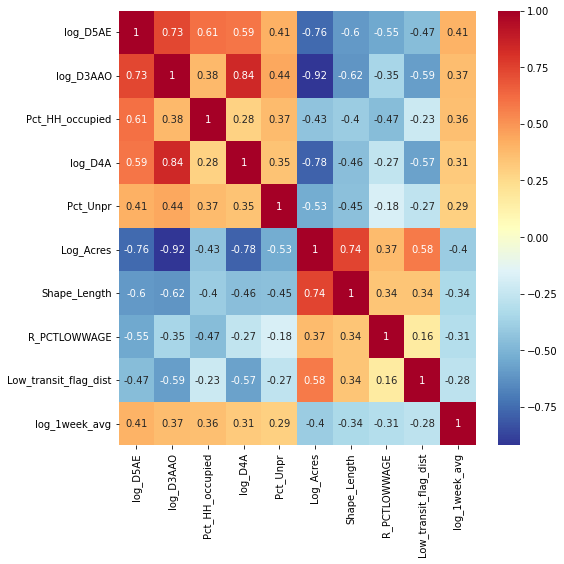

In [17]:
X1 = X[['log_D5AE', 'log_D3AAO', 'Pct_HH_occupied', 'log_D4A', 'Pct_Unpr',
        'Log_Acres', 'Shape_Length', 'R_PCTLOWWAGE', 'Low_transit_flag_dist']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, random_state=42)

plt.figure(figsize = (8, 8))
sns.heatmap(pd.concat([X1, y], axis = 1, join = 'inner').corr(), 
            annot = True, cmap = 'RdYlBu_r')

SFS is superior to taking only the features with the strongest correlations to target.

In [18]:
pipe_lr = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

model_run(pipe_lr, X1_train, X1_test, y1_train, y1_test)

train score:  0.22446149710113028
test score:  0.22912320695501787
rmse:  0.6228682294560756


### LA dataset models

In [19]:
y_la = air_la['log_1week_avg']
X_train_la, X_test_la, y_train_la, y_test_la = train_test_split(X_la, y_la, random_state = 42)

In [20]:
from sklearn.base import clone
pipe2_la = clone(pipe2)
# pipe2_la.set_params(sequentialfeatureselector__n_features_to_select = 7)

In [21]:
model_run(pipe2_la, X_train_la, X_test_la, y_train_la, y_test_la)

train score:  0.4863640419227081
test score:  0.3678428566161428
rmse:  0.5027720352035986


In [22]:
features_la = X_la.columns[pipe2_la.named_steps['sequentialfeatureselector'].get_support()]
features_la

Index(['Pct_AO2p', 'E5_Ind', 'D1C5_OFF', 'D5AR', 'D5AE', 'Log_Acres',
       'pct_E5_Off', 'log_D5AE'],
      dtype='object')

### Model coefficients

All data

In [23]:
pd.DataFrame({'coef': pipe2.named_steps['linearregression'].coef_},
              index =  features)

,coef
temp_f,9.738277e-03
CBSA_POP,-3.334473e-07
CBSA_EMP,5.841282e-07
Pct_AO2p,-3.340779e-01
Log_Acres,-4.956099e-02
Pct_HH_occupied,5.724298e-01
log_D5AE,1.241778e-01
pow_D5CE,-7.108496e-01


LA

In [24]:
pd.DataFrame({'coef': pipe2_la.named_steps['linearregression'].coef_},
              index =  features_la)

,coef
Pct_AO2p,-0.343512
E5_Ind,0.000064
D1C5_OFF,-0.013499
D5AR,-0.000005
D5AE,0.000007
Log_Acres,-0.086268
pct_E5_Off,0.616272
log_D5AE,0.078319


#### Multicollinearity check

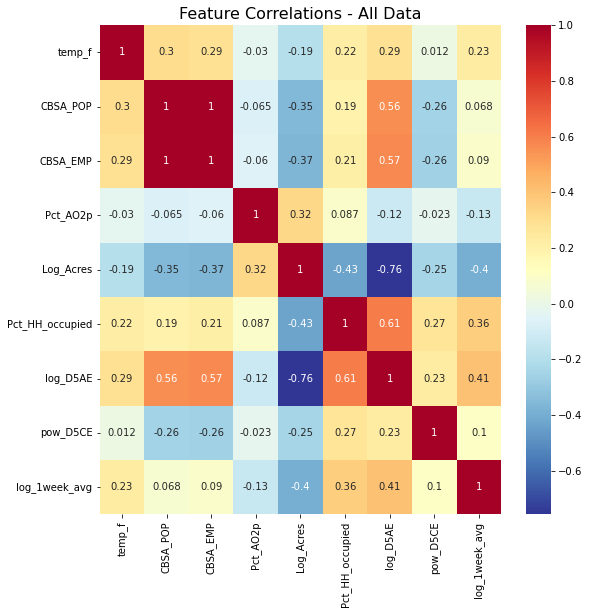

In [25]:
plt.figure(figsize = (9, 9))
sns.heatmap(pd.concat([X[features], y], axis = 1, join = 'inner').corr(), 
            annot = True, cmap = 'RdYlBu_r')
plt.title("Feature Correlations - All Data", fontsize = 16);

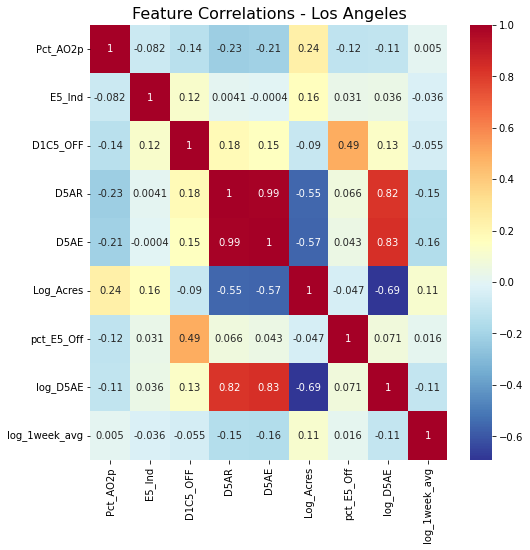

In [26]:
plt.figure(figsize = (8, 8))
sns.heatmap(pd.concat([X_la[features_la], y], axis = 1, join = 'inner').corr(), 
            annot = True, cmap = 'RdYlBu_r')
plt.title("Feature Correlations - Los Angeles", fontsize = 16);

In [27]:
X[['CBSA_POP', 'CBSA_EMP']].corr()

,CBSA_POP,CBSA_EMP
CBSA_POP,1.000000,0.995565
CBSA_EMP,0.995565,1.000000


In [28]:
X[['D5AR', 'D5AE']].corr()

,D5AR,D5AE
D5AR,1.000000,0.988722
D5AE,0.988722,1.000000


#### Drop correlated inputs

In order to interpret our model's coefficients we need to remove highly correlated input variables.

In [29]:
features_decorr = features.drop('CBSA_EMP') # correlated to CBSA_POP

In [30]:
features_la_decorr = features_la.drop(['D5AE', 'D5AR']) # both correlated to log_D5AE
features_la_decorr = features_la_decorr.drop(['D1C5_OFF']) # correlated to pct_E5_OFF

In [31]:
lr = LinearRegression()

model_run(lr, X_train[features_decorr], X_test[features_decorr], 
          y_train, y_test)

train score:  0.26902897995276054
test score:  0.24629349700067882
rmse:  0.615892371405338


In [32]:
pd.DataFrame({'coef': lr.coef_}, index =  features_decorr)

,coef
temp_f,8.302439e-03
CBSA_POP,-5.989267e-08
Pct_AO2p,-2.872118e-01
Log_Acres,-5.537839e-02
Pct_HH_occupied,6.311089e-01
log_D5AE,1.387315e-01
pow_D5CE,-8.650281e-01


In [33]:
lr_la = LinearRegression()

model_run(lr_la, X_train_la[features_la_decorr], X_test_la[features_la_decorr], 
          y_train_la, y_test_la)

train score:  0.4420466828873887
test score:  0.33651993930744883
rmse:  0.515077437752319


In [34]:
pd.DataFrame({'coef': lr_la.coef_}, index =  features_la_decorr)

,coef
Pct_AO2p,-0.406770
E5_Ind,0.000055
Log_Acres,-0.084928
pct_E5_Off,0.322075
log_D5AE,0.172058


### Presentation feature set

Use unlogged and percent versions of features for interpretability.

In [50]:
pres_features = ['Pct_AO2p', 'pct_E5_Ind', 'pct_E5_Off', 'Log_Acres', 'log_D5AE']

In [58]:
X_la[pres_features].corr()

,Pct_AO2p,pct_E5_Ind,pct_E5_Off,Log_Acres,log_D5AE
Pct_AO2p,1.000000,0.177393,-0.117812,0.237467,-0.113460
pct_E5_Ind,0.177393,1.000000,-0.125418,0.290612,-0.197544
pct_E5_Off,-0.117812,-0.125418,1.000000,-0.047042,0.071125
Log_Acres,0.237467,0.290612,-0.047042,1.000000,-0.691152
log_D5AE,-0.113460,-0.197544,0.071125,-0.691152,1.000000


In [51]:
lr2 = LinearRegression()
model_run(lr2, X_train_la[pres_features], X_test_la[pres_features],
          y_train_la, y_test_la)

train score:  0.44040786509763274
test score:  0.3465632092027887
rmse:  0.5111641417012769


In [53]:
coeffs = pd.DataFrame({'coef': lr2.coef_}, index =  pres_features)
coeffs

,coef
Pct_AO2p,-0.464961
pct_E5_Ind,0.282629
pct_E5_Off,0.356238
Log_Acres,-0.079924
log_D5AE,0.184278


Percentages should be scaled 0 to 100, so divide their coefficients by 100 to account for a 1 percent change.

In [57]:
X_la[['Pct_AO2p', 'pct_E5_Ind', 'pct_E5_Off']].describe()

,Pct_AO2p,pct_E5_Ind,pct_E5_Off
count,820.000000,820.000000,820.000000
mean,0.655963,0.174223,0.085851
std,0.186566,0.202173,0.126438
min,0.000000,0.000000,0.000000
25%,0.538723,0.029344,0.011236
50%,0.684014,0.090096,0.042641
75%,0.798694,0.238095,0.107034
max,1.000000,0.939759,0.946565
